# IMPORTS and PREP

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
full_df = pd.read_csv(url)

In [4]:
full_df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [6]:
full_df.keys()

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [25]:
# remove 1 column
COLUMNS = [x for x in full_df.keys() if x in ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg',"MSRP"]]
COLUMNS

['Make',
 'Model',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'MSRP']

In [35]:
df = full_df[COLUMNS]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [36]:
df = df.rename(columns={"MSRP": "price"})
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [38]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [39]:
df = df.fillna(0)

In [40]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

# Q1

In [41]:
# Q1 : more freq value of transmission_type ==> AUTOMATIC
df.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

# Q2

In [42]:
df.corr()

/tmp/ipykernel_3321/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


/tmp/ipykernel_3321/1042200255.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

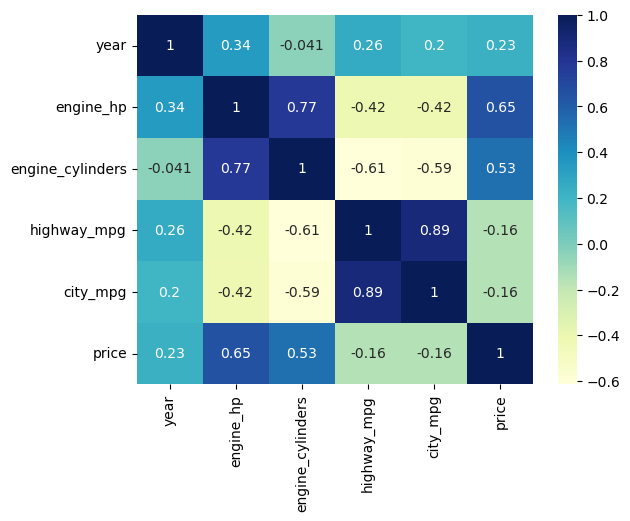

In [43]:
# Q2: the most corr<1 value is 0.89 : highway_mpg and city_mpg  
import seaborn as sns

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [47]:
avg = df.price.mean()
avg

40594.737032063116

In [45]:
df['above_average'] = df.price.apply(lambda x: 1 if x>avg else 0)

In [48]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [50]:
del df["price"]

In [51]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [83]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [84]:
# check split
round(len(df_train)/len(df),2), round(len(df_val)/len(df),2), round(len(df_test)/len(df),2)

(0.6, 0.2, 0.2)

# Q3

In [85]:
from sklearn.metrics import mutual_info_score

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7148 entries, 3972 to 10286
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7148 non-null   object 
 1   model              7148 non-null   object 
 2   year               7148 non-null   int64  
 3   engine_hp          7148 non-null   float64
 4   engine_cylinders   7148 non-null   float64
 5   transmission_type  7148 non-null   object 
 6   vehicle_style      7148 non-null   object 
 7   highway_mpg        7148 non-null   int64  
 8   city_mpg           7148 non-null   int64  
 9   above_average      7148 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 614.3+ KB


In [87]:
CATEGORICAL = ['make','model','transmission_type','vehicle_style']
CATEGORICAL

['make', 'model', 'transmission_type', 'vehicle_style']

In [89]:
# Q3: lowest MI is for transmission_type
for c in CATEGORICAL:
    print(f' Variable "{c}", Mutual Information Score = {round(mutual_info_score(df_train.above_average,df_train[c]),2)}')

 Variable "make", Mutual Information Score = 0.24
 Variable "model", Mutual Information Score = 0.46
 Variable "transmission_type", Mutual Information Score = 0.02
 Variable "vehicle_style", Mutual Information Score = 0.08


In [90]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train.above_average)

In [91]:
mi = df_train[CATEGORICAL].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

model                0.462344
make                 0.239769
vehicle_style        0.084143
transmission_type    0.020958
dtype: float64

In [92]:
# Define the output variable
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [93]:
NUMERICAL = [x for x in df_train.keys() if x not in CATEGORICAL]
NUMERICAL

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

# Q4

In [94]:
from sklearn.feature_extraction import DictVectorizer

In [95]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[CATEGORICAL + NUMERICAL].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[CATEGORICAL + NUMERICAL].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [96]:
from sklearn.linear_model import LogisticRegression

In [100]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [101]:
model.intercept_[0]


-0.3499031192168502

In [104]:
model.coef_[0].round(3)


array([ 7.600e-02, -1.280e-01,  3.700e-02, -2.000e-03,  1.315e+00,
        1.774e+00,  5.850e-01,  2.762e+00,  2.142e+00,  1.760e-01,
        0.000e+00, -4.770e-01,  2.101e+00, -1.269e+00, -1.335e+00,
       -3.856e+00, -5.040e-01,  3.660e-01, -1.815e+00, -7.610e-01,
        6.050e-01, -2.380e-01, -1.248e+00, -2.693e+00,  3.750e-01,
       -1.490e+00,  1.000e-02,  1.928e+00,  1.248e+00,  1.197e+00,
        4.014e+00,  1.038e+00,  5.000e-03, -1.658e+00,  0.000e+00,
        8.740e-01, -1.991e+00, -8.740e-01, -1.418e+00, -3.450e-01,
       -3.168e+00,  2.021e+00,  9.580e-01,  8.920e-01, -2.320e-01,
        3.240e-01, -2.701e+00, -1.910e+00,  3.225e+00, -9.930e-01,
       -5.730e-01,  1.262e+00, -1.346e+00, -3.940e-01, -4.700e-02,
       -9.000e-03, -2.000e-03, -1.176e+00, -9.030e-01, -3.000e-03,
       -4.000e-03, -3.000e-03, -1.880e-01, -2.300e-02,  1.647e+00,
        4.320e-01, -4.520e-01, -6.500e-02, -1.640e-01, -1.610e-01,
       -0.000e+00, -1.600e-02, -9.940e-01,  1.530e-01,  2.000e

In [102]:
y_pred = model.predict_proba(X_val)[:, 1]

In [105]:
avg_decision = (y_pred >= 0.5)


In [106]:
(y_val == avg_decision).mean()


0.9454469156525388

In [107]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = avg_decision.astype(int)
df_pred['actual'] = y_val

In [108]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [110]:
# Q4 Accuracy is 0.95
round(df_pred.correct.mean(),2)


0.95

# Q5 "Feature elimination technique"

In [ ]:
# tbd

# Q6 "Linear regression from Scikit-learn"

In [ ]:
# RidgeRegression
